<a href="https://colab.research.google.com/github/MiracleCakra/Machine-Learning_Ganjil_2025/blob/main/Week10_JS09_KLASIFIKASI/Tugas_2_KLASIFIKASI_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DAN PREPROCESSING DATA

In [9]:
df = pd.read_csv('spam.csv', encoding='latin-1')

df = df[['v1', 'v2']]
df.columns = ['Labels', 'SMS']

# Tampilkan info dataset
print(f"\nJumlah total data: {len(df)}")
print(f"\nDistribusi kelas:")
print(df['Labels'].value_counts())
print(f"\nPersentase:")
print(df['Labels'].value_counts(normalize=True) * 100)

print("\nContoh data:")
print(df.head(10))

# Split data menjadi training dan testing (80:20)
X = df['SMS']
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nJumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah total data: 5572

Distribusi kelas:
Labels
ham     4825
spam     747
Name: count, dtype: int64

Persentase:
Labels
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

Contoh data:
  Labels                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
6    ham  Even my brother is not like to speak with me. ...
7    ham  As per your request 'Melle Melle (Oru Minnamin...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...

Jumlah data training: 4457
Jumlah data testing: 1115


# A. Buatlah model klasfikasi Multinomial Naive Bayes

1. Menggunakan data spam.csv

2. Fitur CountVectorizer dengan mengaktifkan stop_words

3. Evaluasi hasilnya

## Feature Extraction dengan CountVectorizer

In [12]:
count_vectorizer = CountVectorizer(stop_words='english')
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

print(f"Jumlah fitur (vocabulary): {len(count_vectorizer.vocabulary_)}")
print(f"Shape data training: {X_train_counts.shape}")
print(f"Shape data testing: {X_test_counts.shape}")

Jumlah fitur (vocabulary): 7440
Shape data training: (4457, 7440)
Shape data testing: (1115, 7440)


## Training Model Multinomial Naive Bayes

In [14]:
nb_counts = MultinomialNB()
nb_counts.fit(X_train_counts, y_train)
print("Training Model Berhasil")

Training Model Berhasil


## Prediksi dan Evaluasi Model

------------------------------------------------------------
Accuracy: 0.9839 (98.39%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[960   6]
 [ 12 137]]
Confusion matrix disimpan sebagai 'confusion_matrix_countvectorizer.png'


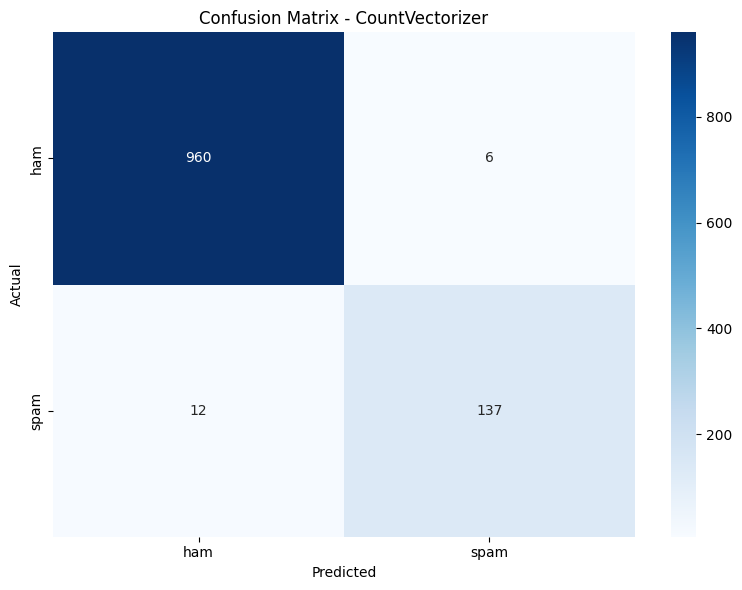

In [16]:
y_pred_counts = nb_counts.predict(X_test_counts)

print("-" * 60)
accuracy_counts = accuracy_score(y_test, y_pred_counts)
print(f"Accuracy: {accuracy_counts:.4f} ({accuracy_counts*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_counts))

# Confusion Matrix
cm_counts = confusion_matrix(y_test, y_pred_counts)
print("\nConfusion Matrix:")
print(cm_counts)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_counts, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - CountVectorizer')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_countvectorizer.png', dpi=300, bbox_inches='tight')
print("Confusion matrix disimpan sebagai 'confusion_matrix_countvectorizer.png'")

# B. uatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data spam.csv

2. Fitur TF-IDF dengan mengaktifkan stop_words

3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

## Feature Extraction dengan TF-IDF

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Jumlah fitur (vocabulary): {len(tfidf_vectorizer.vocabulary_)}")
print(f"Shape data training: {X_train_tfidf.shape}")
print(f"Shape data testing: {X_test_tfidf.shape}")

Jumlah fitur (vocabulary): 7440
Shape data training: (4457, 7440)
Shape data testing: (1115, 7440)


## Training Model Multinominal Naive

In [21]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
print("Training Model Berhasil!")

Training Model Berhasil!


## Prediksi dan Evaluasi Model

In [22]:
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("\nStep 4: Evaluasi Model dengan TF-IDF")
print("-" * 60)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy: {accuracy_tfidf:.4f} ({accuracy_tfidf*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf))


Step 4: Evaluasi Model dengan TF-IDF
------------------------------------------------------------
Accuracy: 0.9686 (96.86%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



## Confusion Matrix


Confusion Matrix:
[[966   0]
 [ 35 114]]
Confusion matrix disimpan sebagai 'confusion_matrix_tfidf.png'


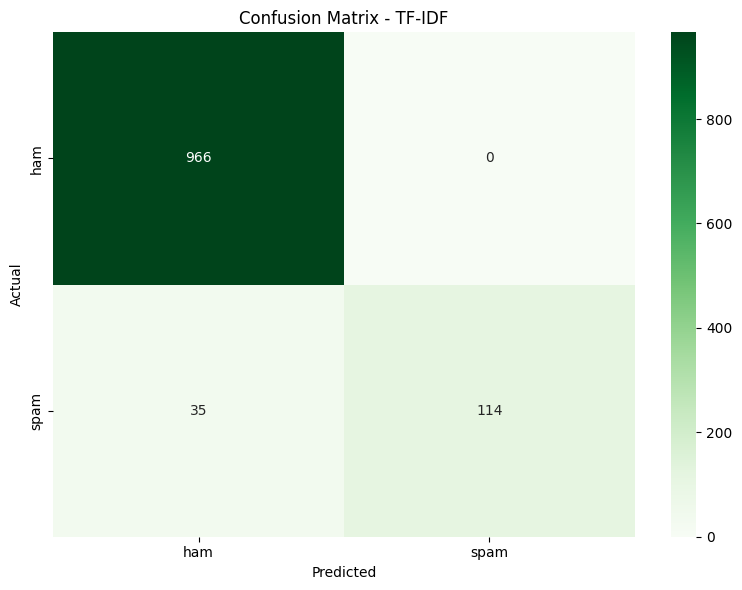

In [24]:
# Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("\nConfusion Matrix:")
print(cm_tfidf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - TF-IDF')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix_tfidf.png', dpi=300, bbox_inches='tight')
print("Confusion matrix disimpan sebagai 'confusion_matrix_tfidf.png'")

# Perbandingan


PERBANDINGAN HASIL

          Metode  Accuracy  Accuracy (%)
CountVectorizer  0.983857     98.385650
         TF-IDF  0.968610     96.860987

Grafik perbandingan disimpan sebagai 'comparison_accuracy.png'


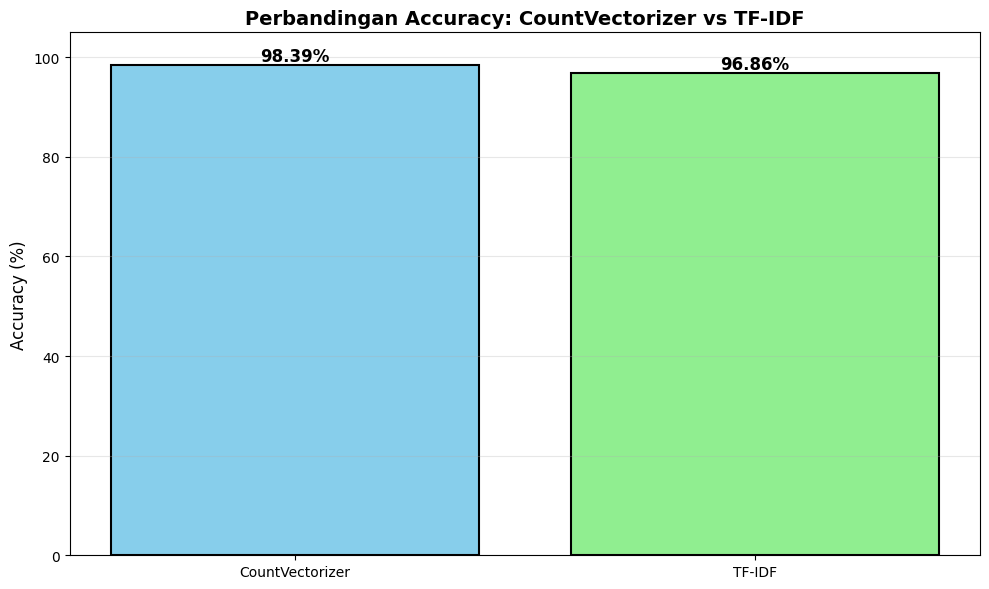

In [25]:
print("\n" + "="*80)
print("PERBANDINGAN HASIL")
print("="*80)

# Tabel perbandingan
comparison_df = pd.DataFrame({
    'Metode': ['CountVectorizer', 'TF-IDF'],
    'Accuracy': [accuracy_counts, accuracy_tfidf],
    'Accuracy (%)': [accuracy_counts*100, accuracy_tfidf*100]
})

print("\n", comparison_df.to_string(index=False))

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
methods = ['CountVectorizer', 'TF-IDF']
accuracies = [accuracy_counts * 100, accuracy_tfidf * 100]

bars = plt.bar(methods, accuracies, color=['skyblue', 'lightgreen'],
               edgecolor='black', linewidth=1.5)

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Perbandingan Accuracy: CountVectorizer vs TF-IDF',
          fontsize=14, fontweight='bold')
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('comparison_accuracy.png', dpi=300, bbox_inches='tight')
print("\nGrafik perbandingan disimpan sebagai 'comparison_accuracy.png'")

# Kesimpulan Hasil

In [29]:
print("\n" + "="*80)
print("KESIMPULAN")
print("="*80)

print("\nBerdasarkan hasil evaluasi:")
print(f"1. CountVectorizer menghasilkan accuracy: {accuracy_counts*100:.2f}%")
print(f"2. TF-IDF menghasilkan accuracy: {accuracy_tfidf*100:.2f}%")

if accuracy_tfidf > accuracy_counts:
    diff = (accuracy_tfidf - accuracy_counts) * 100
    print(f"\n✓ TF-IDF lebih baik dengan selisih {diff:.2f}%")
    print("\nAlasan:")
    print("- TF-IDF memberikan bobot yang lebih baik untuk kata-kata penting")
    print("- TF-IDF mengurangi pengaruh kata yang sering muncul")
    print("- TF-IDF lebih efektif dalam membedakan spam dan ham")
elif accuracy_counts > accuracy_tfidf:
    diff = (accuracy_counts - accuracy_tfidf) * 100
    print(f"CountVectorizer lebih baik dengan selisih {diff:.2f}%")
    print("\nAlasan:")
    print("- CountVectorizer mempertahankan frekuensi asli kata")
    print("- Untuk dataset ini, frekuensi murni lebih informatif")
else:
    print("Kedua metode menghasilkan performance yang sama")

print("\n" + "="*80)
print("CONTOH PREDIKSI PADA TEKS BARU")
print("="*80)

test_messages = [
    "Congratulations! You've won a free prize. Call now!",
    "Hey, are you free for dinner tonight?",
    "URGENT! You have won £1000. Click here to claim.",
    "Can you pick up some milk on your way home?"
]

print("\nMenggunakan model TF-IDF (yang terbaik):\n")
for i, message in enumerate(test_messages, 1):
    message_tfidf = tfidf_vectorizer.transform([message])
    prediction = nb_tfidf.predict(message_tfidf)[0]
    probability = nb_tfidf.predict_proba(message_tfidf)[0]

    print(f"{i}. Pesan: \"{message}\"")
    print(f"   Prediksi: {prediction}")
    print(f"   Probabilitas: ham={probability[0]:.4f}, spam={probability[1]:.4f}")
    print()

print("="*80)


KESIMPULAN

Berdasarkan hasil evaluasi:
1. CountVectorizer menghasilkan accuracy: 98.39%
2. TF-IDF menghasilkan accuracy: 96.86%
CountVectorizer lebih baik dengan selisih 1.52%

Alasan:
- CountVectorizer mempertahankan frekuensi asli kata
- Untuk dataset ini, frekuensi murni lebih informatif

CONTOH PREDIKSI PADA TEKS BARU

Menggunakan model TF-IDF (yang terbaik):

1. Pesan: "Congratulations! You've won a free prize. Call now!"
   Prediksi: spam
   Probabilitas: ham=0.2940, spam=0.7060

2. Pesan: "Hey, are you free for dinner tonight?"
   Prediksi: ham
   Probabilitas: ham=0.9921, spam=0.0079

3. Pesan: "URGENT! You have won £1000. Click here to claim."
   Prediksi: spam
   Probabilitas: ham=0.0699, spam=0.9301

4. Pesan: "Can you pick up some milk on your way home?"
   Prediksi: ham
   Probabilitas: ham=0.9958, spam=0.0042

